     INTRODUCTION GENERALE: 
Ce projet présente une analyse des données du classement de la Premier League , extraites du site Foot Mercato. L'objectif est d'explorer les performances des équipes à travers différentes statistiques, telles que les points accumulés, les buts marqués et encaissés, ainsi que les moyennes des victoires, matchs nuls et défaites. Les visualisations créées à l'aide de bibliothèques comme pandas, seaborn et matplotlib permettent de mieux comprendre les tendances et les écarts entre les équipes.

In [3]:

import pandas as pd      # Manipulation et analyse de données          
import numpy as np       # Calculs numériques          
import seaborn as sns    #Visualisation de données         
import matplotlib.pyplot as plt    
from bs4 import BeautifulSoup   #Parsing HTML/XML pour le web scraping   
import requests                #Envoyer des requêtes HTTP (récupération du contenu web)                   
from tabulate import tabulate #Afficher des données sous forme de tableaux

In [4]:
#Extraction des donneés du site sous forme d'un tableau
link = "https://www.footmercato.net/angleterre/premier-league/classement"
html = requests.get(link).content
soup = BeautifulSoup(html, 'html.parser')
# Vérifiez s'il y a des nœuds de table
table_node = soup.find_all('table')

if len(table_node) > 0:
    # Extraire le contenu de la table
    table_content = pd.read_html(str(table_node[0]), header=0)[0]
    
    # Vérifiez et corrigez les noms des colonnes si nécessaire
    table_content.columns = table_content.columns.str.replace('[^A-Za-z0-9]+', 'E', regex=True)
    
    print(table_content)
else:
    print("No table nodes found in the HTML.")

     E          Equipe  Pts   J  DIF   G   N   D  BP  BC
0    1       Liverpool   82  34   48  25   7   2  80  32
1    2         Arsenal   67  34   34  18  13   3  63  29
2    3       Newcastle   62  34   21  19   5  10  65  44
3    4        Man City   61  34   23  18   7   9  66  43
4    5         Chelsea   60  34   19  17   9   8  59  40
5    6      Nottingham   60  33   14  18   6   9  53  39
6    7     Aston Villa   57  34    5  16   9   9  54  49
7    8          Fulham   51  34    4  14   9  11  50  46
8    9        Brighton   51  34    1  13  12   9  56  55
9   10     Bournemouth   50  34   12  13  11  10  53  41
10  11       Brentford   46  33    6  13   7  13  56  50
11  12  Crystal Palace   45  34   -4  11  12  11  43  47
12  13   Wolverhampton   41  34  -10  12   5  17  51  61
13  14      Man United   39  34   -8  10   9  15  39  47
14  15         Everton   38  34   -7   8  14  12  34  41
15  16       Tottenham   37  34    6  11   4  19  62  56
16  17        West Ham   36  34

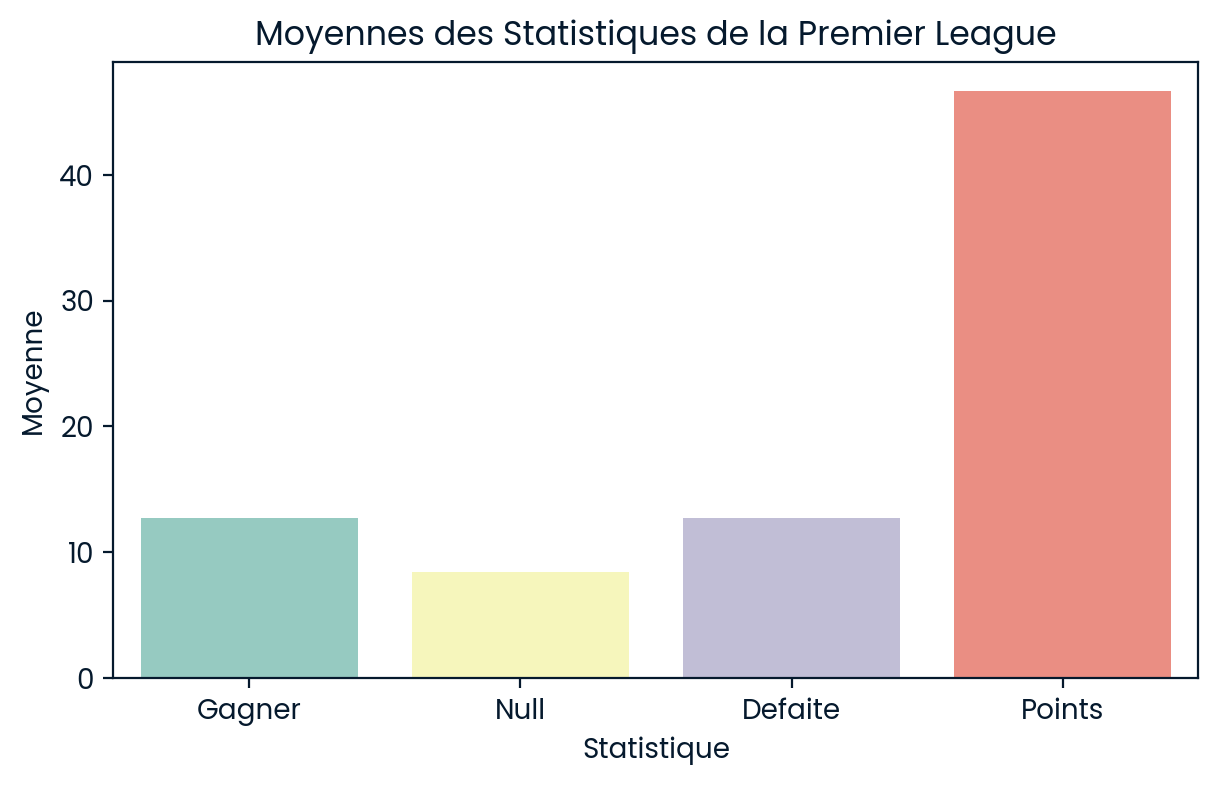

In [5]:
# Calculer les moyennes
moyenne_wins = table_content['G'].mean()
moyenne_drows = table_content['N'].mean()
moyenne_loses = table_content['D'].mean()
moyenne_pts = table_content['Pts'].mean()

# Créer un dataframe pour les moyennes
moyennes_df = pd.DataFrame({
    'Statistique': ['Gagner', 'Null', 'Defaite', 'Points'],
    'Moyenne': [moyenne_wins, moyenne_drows, moyenne_loses, moyenne_pts]
})

# Afficher les résultats en courbe avec une palette de couleur
plt.figure(figsize=(7, 4))
sns.barplot(data=moyennes_df, x='Statistique', y='Moyenne', hue='Statistique', 
            palette='Set3', dodge=False)

plt.title('Moyennes des Statistiques de la Premier League')
plt.xlabel('Statistique')
plt.ylabel('Moyenne')
sns.set_style('whitegrid')  # Équivalent de theme_minimal()
plt.show()

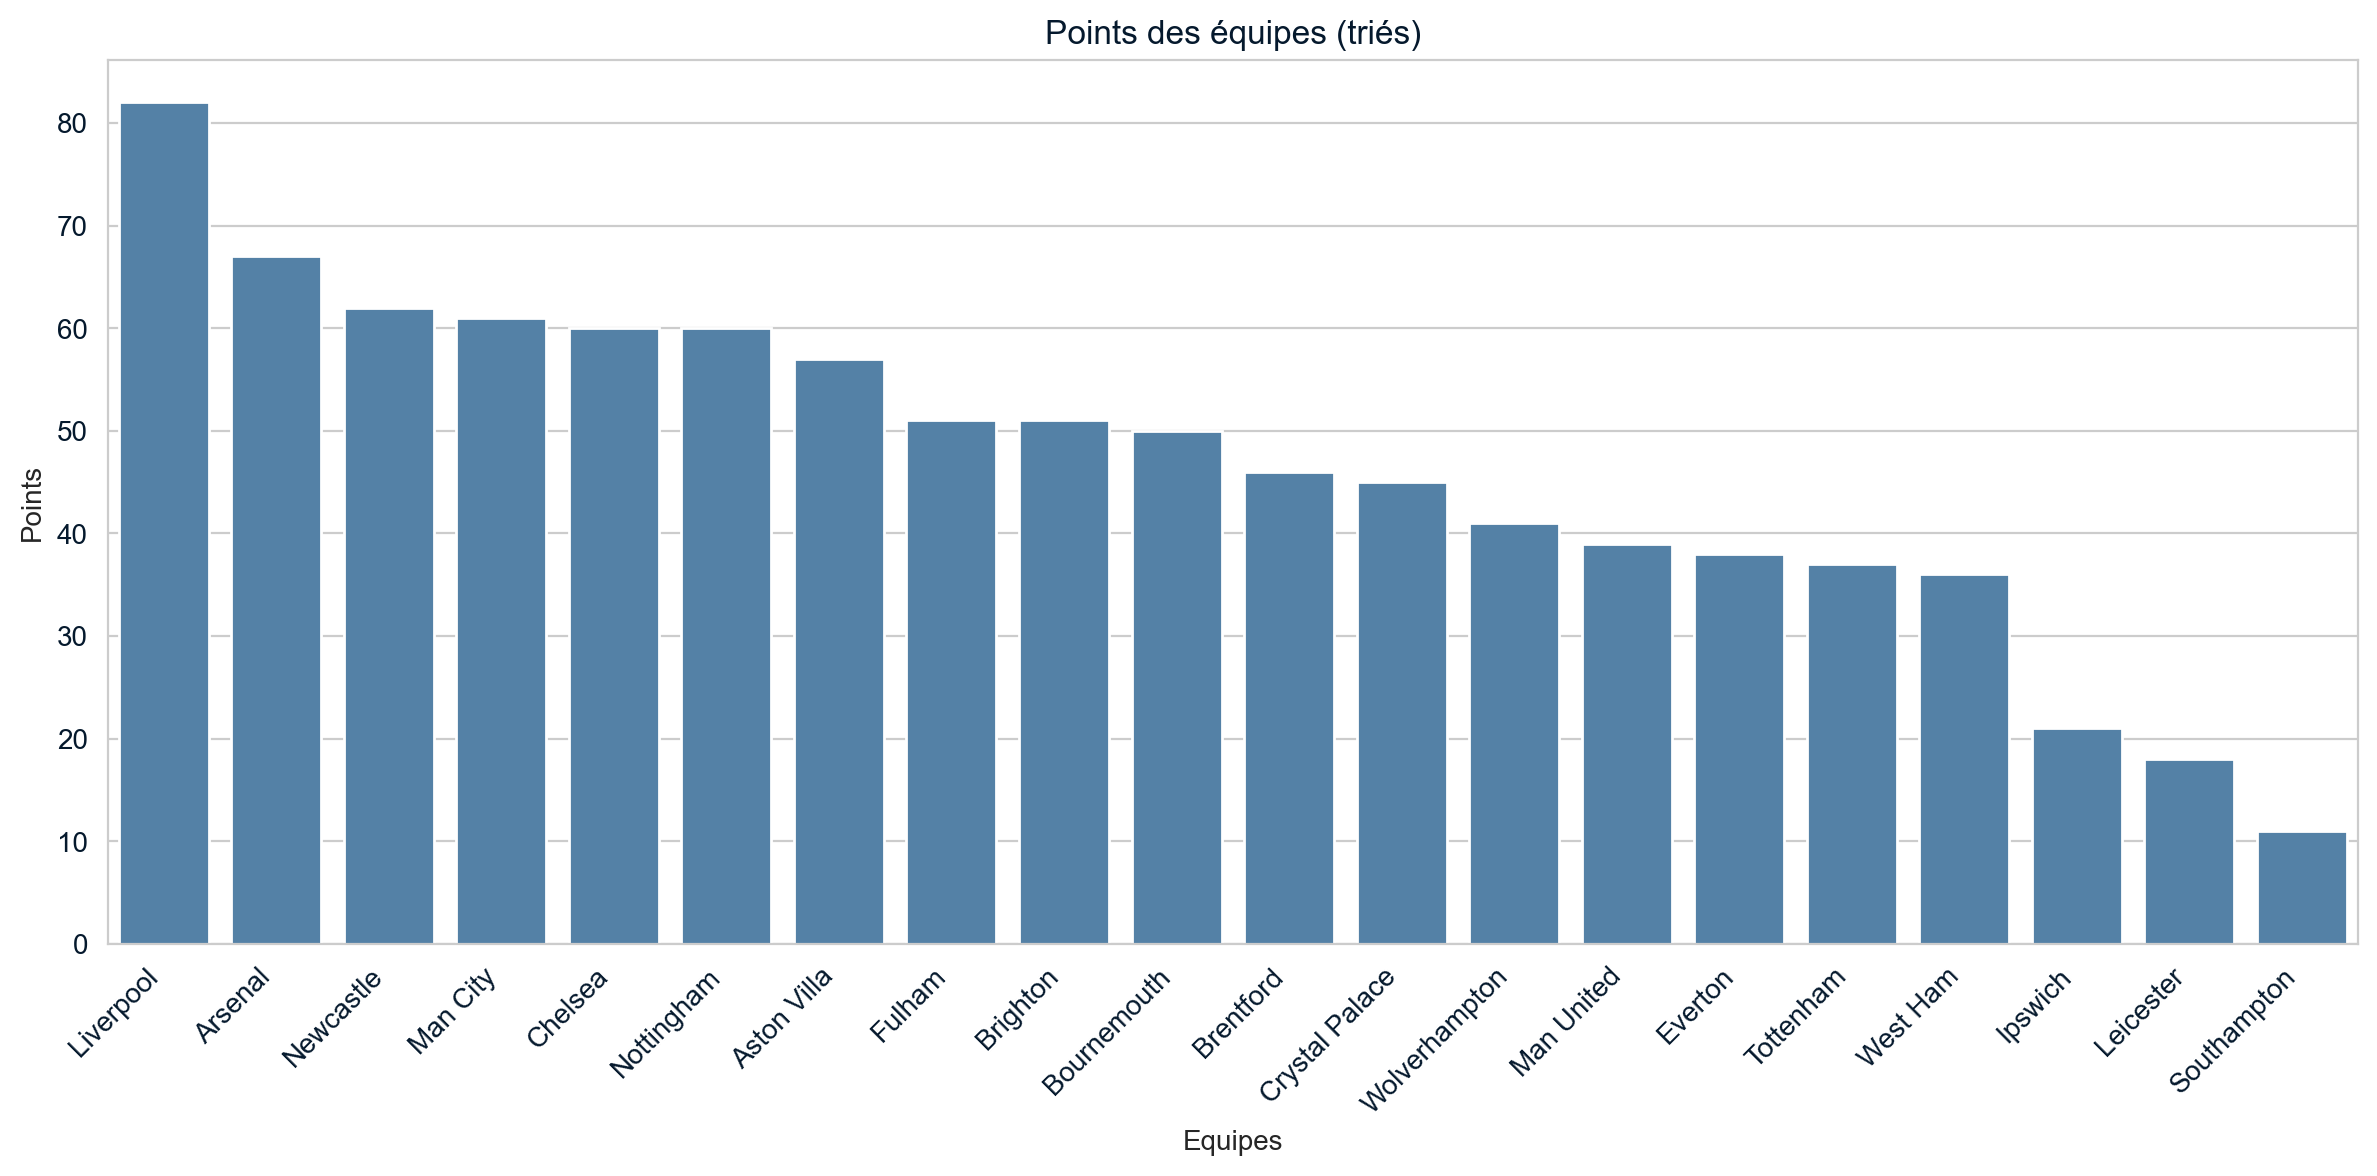

In [6]:
#Points accumulées
plt.figure(figsize=(12, 6))
sns.barplot(data=table_content, 
            x='Equipe', 
            y='Pts',
            order=table_content.sort_values('Pts', ascending=False)['Equipe'],
            color='steelblue')

plt.title('Points des équipes (triés)')
plt.xlabel('Equipes')
plt.ylabel('Points')
plt.xticks(rotation=45, ha='right')
sns.set_style('whitegrid')
plt.tight_layout()
plt.show()

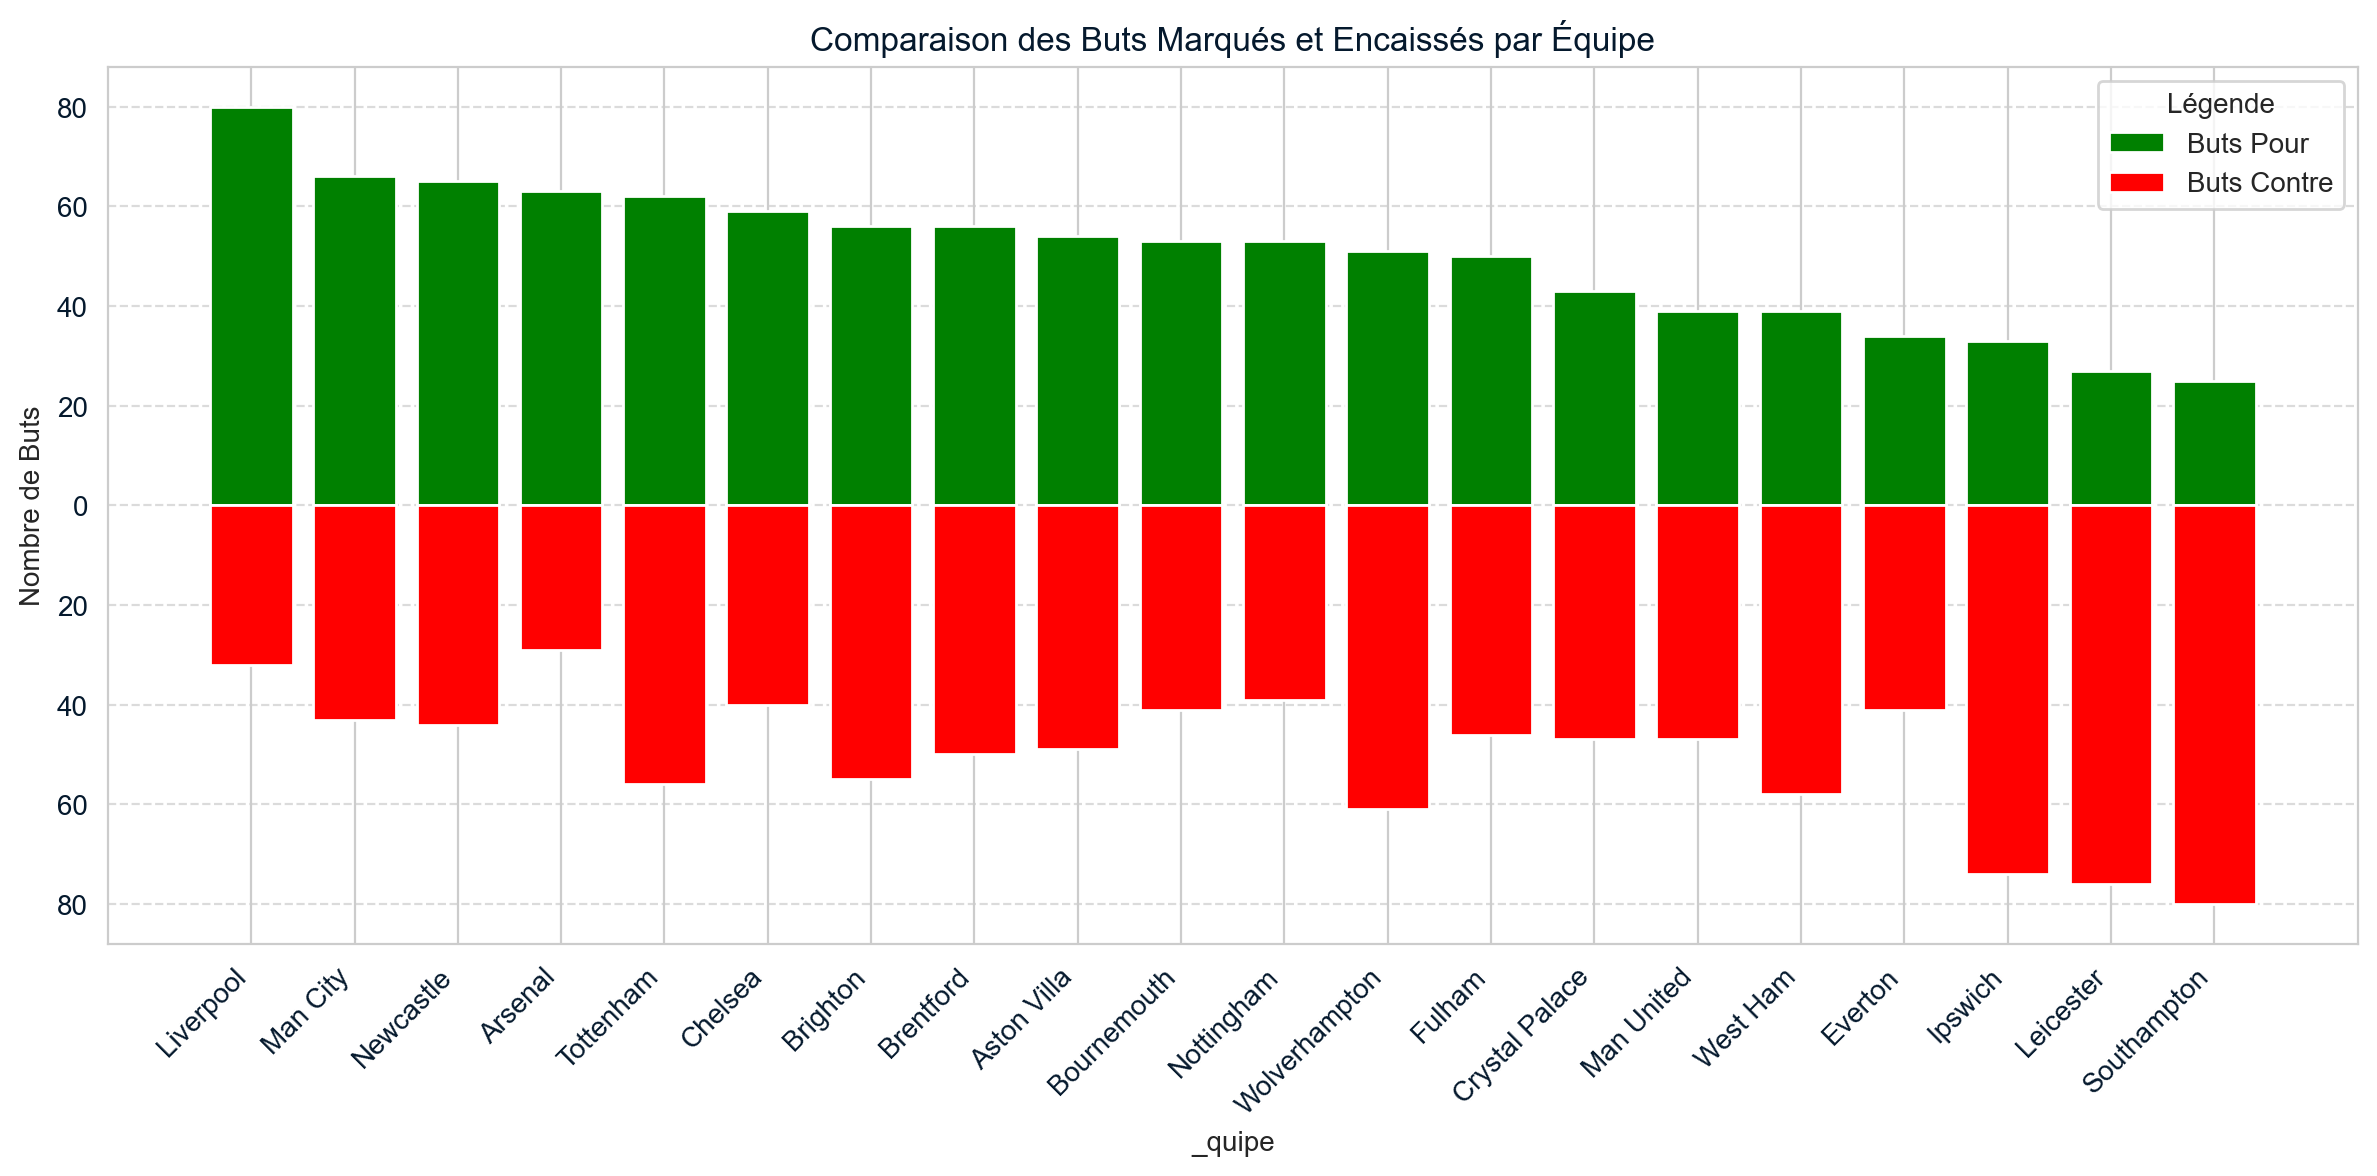

In [7]:
# Trier les équipes par BP (Buts Pour)
table_content_sorted = table_content.sort_values('BP', ascending=False)

plt.figure(figsize=(12, 6))

# Barres pour Buts Pour (BP)
plt.bar(table_content_sorted['Equipe'], 
        table_content_sorted['BP'], 
        color='green', 
        label='Buts Pour')

# Barres pour Buts Contre (BC) - affichés vers le bas
plt.bar(table_content_sorted['Equipe'], 
        -table_content_sorted['BC'], 
        color='red', 
        label='Buts Contre')

plt.title('Comparaison des Buts Marqués et Encaissés par Équipe')
plt.xlabel('_quipe')
plt.ylabel('Nombre de Buts')
plt.xticks(rotation=45, ha='right')

# Ajuster l'axe Y pour afficher les valeurs absolues
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: abs(int(x))))

plt.legend(title='Légende')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
#identification des equipes qui vont participer au ligues des champions(UCL)
premieres_equipes = table_content.head(4)
print(tabulate(premieres_equipes[['Equipe', 'Pts', 'J']], 
               headers=['Equipe', 'Points', 'Matches'], 
               tablefmt='grid'))

+----+-----------+----------+-----------+
|    | Equipe    |   Points |   Matches |
+====+===========+==========+===========+
|  0 | Liverpool |       82 |        34 |
+----+-----------+----------+-----------+
|  1 | Arsenal   |       67 |        34 |
+----+-----------+----------+-----------+
|  2 | Newcastle |       62 |        34 |
+----+-----------+----------+-----------+
|  3 | Man City  |       61 |        34 |
+----+-----------+----------+-----------+


In [9]:
#Identification de l'équipe pour un maximum de buts marqués
max_buts = table_content['BP'].max()
equipe_max = table_content.loc[table_content['BP'] == max_buts, 'Equipe'].values[0]
print(f"L'équipe avec le plus de buts marquées est {equipe_max} avec {max_buts} buts")

L'équipe avec le plus de buts marquées est Liverpool avec 80 buts


In [10]:
max_bc = table_content['BC'].max()
equipe_max_contre = table_content[table_content['BC'] == max_bc]['Equipe'].iloc[0]
print(f"L'équipe ayant encaissé le plus de buts est {equipe_max_contre} avec {max_bc} buts contre")

L'équipe ayant encaissé le plus de buts est Southampton avec 80 buts contre


In [11]:
#identification des equipes qui n'ont pas jouer dans la PL l'anneé prochaine
derniers_equipes = table_content.tail(3)
print(tabulate(derniers_equipes[['Equipe', 'Pts', 'J']], 
               headers=['Equipe', 'Points', 'Matches'], 
               tablefmt='grid'))

+----+-------------+----------+-----------+
|    | Equipe      |   Points |   Matches |
+====+=============+==========+===========+
| 17 | Ipswich     |       21 |        34 |
+----+-------------+----------+-----------+
| 18 | Leicester   |       18 |        34 |
+----+-------------+----------+-----------+
| 19 | Southampton |       11 |        34 |
+----+-------------+----------+-----------+


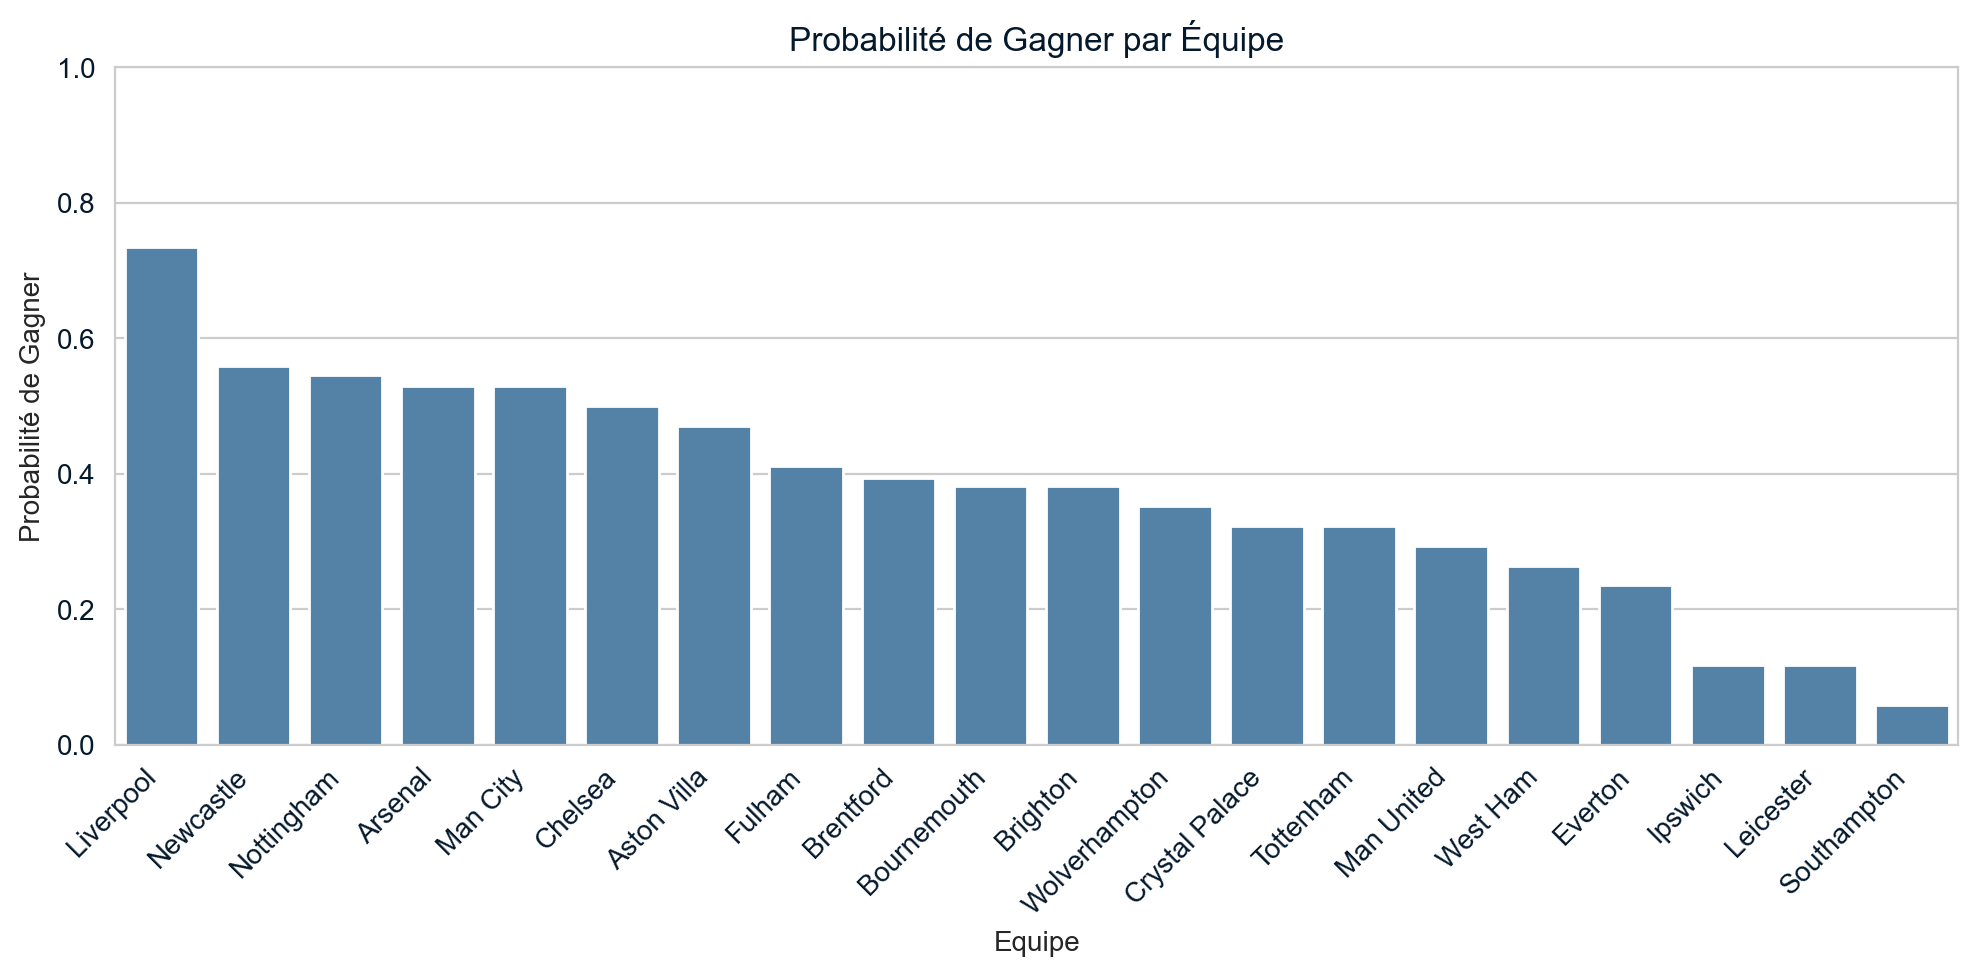

In [12]:
# Calculer la probabilité de gagner
table_content['Probabilite_Gagner'] = table_content['G'] / (table_content['G'] + table_content['D'] + table_content['N'])

# Trier par probabilité décroissante
table_content = table_content.sort_values('Probabilite_Gagner', ascending=False)

# Afficher le graphique
plt.figure(figsize=(10, 5))
sns.barplot(data=table_content, 
            x='Equipe', 
            y='Probabilite_Gagner',
            order=table_content['Equipe'],
            color='steelblue')

plt.title('Probabilité de Gagner par Équipe')
plt.xlabel('Equipe')
plt.ylabel('Probabilité de Gagner')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Pour afficher de 0% à 100%
sns.set_style('whitegrid')
plt.tight_layout()
plt.show()

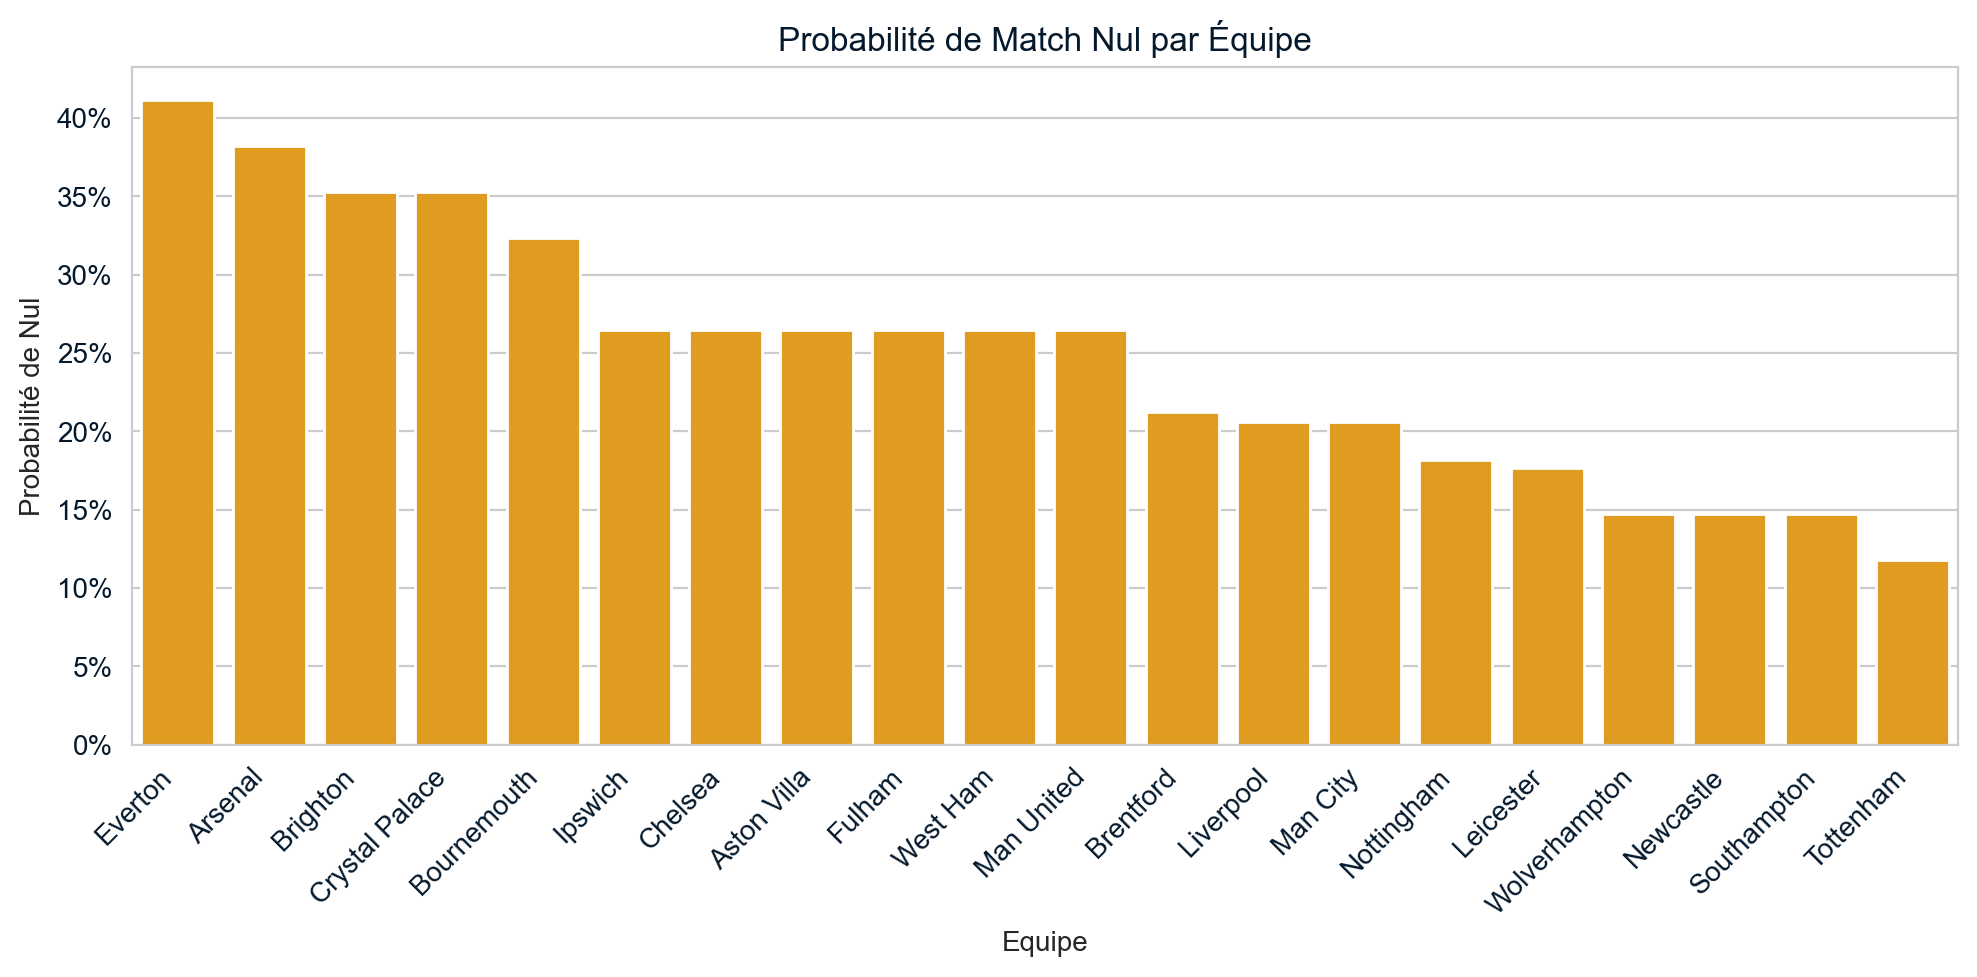

In [13]:
# Calculer la probabilité de match null
table_content['Probabilite_Null'] = table_content['N'] / (table_content['G'] + table_content['D'] + table_content['N'])

# Trier par probabilité décroissante
table_content = table_content.sort_values('Probabilite_Null', ascending=False)

# Créer le graphique
plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=table_content,
    x='Equipe',
    y='Probabilite_Null',
    color='orange'  # Couleur différente pour les nuls
)

# Personnalisation du graphique
plt.title('Probabilité de Match Nul par Équipe')
plt.xlabel('Equipe')
plt.ylabel('Probabilité de Nul')
plt.xticks(rotation=45, ha='right')

# Formater l'axe Y en pourcentages
barplot.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

sns.set_style('whitegrid')
plt.tight_layout()
plt.show()

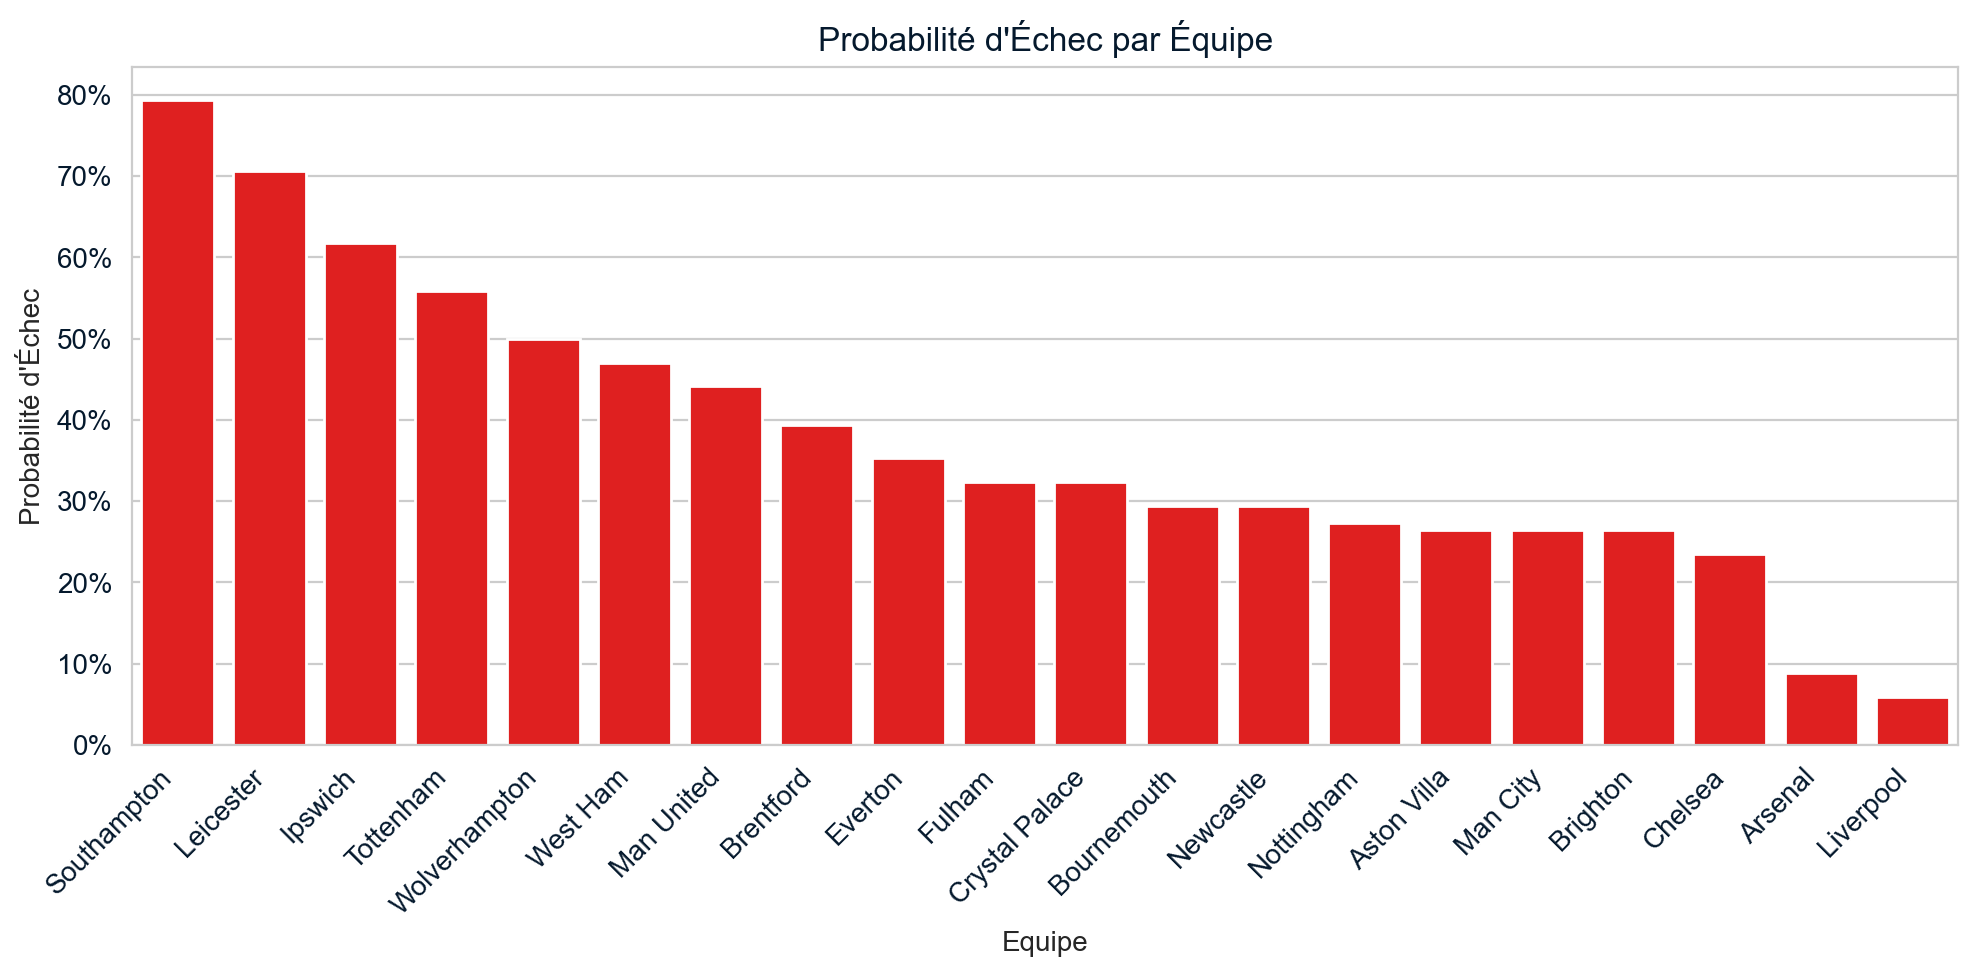

In [14]:
# Calculer la probabilité d'échec (défaites)
table_content['Probabilite_Echec'] = table_content['D'] / (table_content['G'] + table_content['D'] + table_content['N'])

# Trier par probabilité décroissante
table_content = table_content.sort_values('Probabilite_Echec', ascending=False)

# Créer le graphique
plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=table_content,
    x='Equipe',
    y='Probabilite_Echec',
    color='red'  # Couleur rouge pour les défaites
)

# Personnalisation du graphique
plt.title("Probabilité d'Échec par Équipe")
plt.xlabel('Equipe')
plt.ylabel("Probabilité d'Échec")
plt.xticks(rotation=45, ha='right')

# Formater l'axe Y en pourcentages
barplot.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

sns.set_style('whitegrid')
plt.tight_layout()
plt.show()



     CONCLUSION:

 Cette analyse met en lumière les performances variées des équipes de la Premier League. Les visualisations, comme le graphique des points triés par équipe, révèlent les équipes dominantes et celles en difficulté. Les moyennes calculées offrent une perspective globale sur les résultats des matchs, soulignant les forces et faiblesses collectives.

 